In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from helpers import load_csv_data
from helpers import create_csv_submission

%reload_ext autoreload
%autoreload 1
from implementations import *

In [7]:
def _accuracy(Y_pred, Y_true):
    # This function calculates prediction accuracy
    # acc = 1 - np.mean(np.abs(Y_pred - Y_true))
    acc = sum(Y_true == Y_pred) / len(Y_true)
    return acc



def _precision(Y_pred, Y_true):
    prec = Y_pred.T.dot(Y_true.reshape(len(Y_true)))/(Y_pred.sum())
    # TP = np.sum(np.logical_and(np.equal(Y_true,1),np.equal(Y_pred,1)))
    # FP = np.sum(np.logical_and(np.equal(Y_true,0),np.equal(Y_pred,1)))
    # prec = TP / (TP + FP)
    return prec

Loss with Ridge Regression:  0.07768658835161225
[17466] [45034]
[21480] [41020]
Loss with Ridge Regression:  0.07768658898891406
[17467] [45033]
[21480] [41020]
Loss with Ridge Regression:  0.07768659076696643
[17467] [45033]
[21480] [41020]
Loss with Ridge Regression:  0.07768661532766338
[17469] [45031]
[21480] [41020]
Loss with Ridge Regression:  0.0776867670927749
[17469] [45031]
[21480] [41020]
Loss with Ridge Regression:  0.07768692563529558
[17473] [45027]
[21480] [41020]
Loss with Ridge Regression:  0.07768698656679579
[17474] [45026]
[21480] [41020]
Loss with Ridge Regression:  0.07768698013495899
[17474] [45026]
[21480] [41020]
Loss with Ridge Regression:  0.07768754843067156
[17471] [45029]
[21480] [41020]
Loss with Ridge Regression:  0.0777003244817842
[17445] [45055]
[21480] [41020]
Loss with Ridge Regression:  0.0778321181633283
[17369] [45131]
[21480] [41020]
Loss with Ridge Regression:  0.07822164223599302
[17262] [45238]
[21480] [41020]
Loss with Ridge Regression:  0.

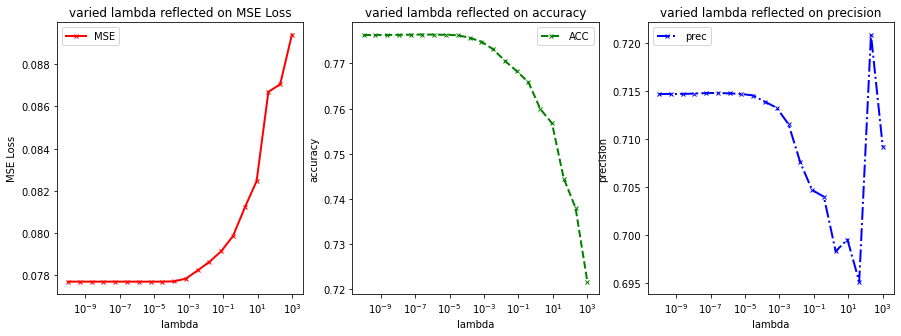

In [8]:
y_train, tx_train, ids_train = load_csv_data("train.csv")

y_train = y_train.reshape(len(y_train),1)

y_train[y_train == -1] = 0

y_train = y_train.reshape(len(y_train),1)

degree = 3
tx_train = build_poly(tx_train, degree)
tx_train = np.c_[np.ones((tx_train.shape[0], 1)), tx_train]

num = y_train.shape[0]
seed = 111
k_fold = 5
k_indices = build_k_indices(num, k_fold, seed)

def ridge_plot(mse_rr, acc_rr, prec_rr, lambdas):
    
    fig, ax = plt.subplots(1,3,figsize=(15,5))
    
    ax[0].semilogx(lambdas, mse_rr, label="MSE", color='r', marker='x', markersize = 4, linestyle='solid', linewidth=2)
    ax[0].set_xlabel("lambda")
    ax[0].set_ylabel("MSE Loss")
    ax[0].legend(loc=0)
    ax[0].set_title("varied lambda reflected on MSE Loss")

    ax[1].semilogx(lambdas, acc_rr, label="ACC", color='g', marker='x', markersize = 4, linestyle='--', linewidth=2)
    ax[1].set_xlabel("lambda")
    ax[1].set_ylabel("accuracy")
    ax[1].legend(loc=0)
    ax[1].set_title("varied lambda reflected on accuracy")
    
    ax[2].semilogx(lambdas, prec_rr, label="prec", color='b', marker='x', markersize = 4, linestyle='-.', linewidth=2)
    ax[2].set_xlabel("lambda")
    ax[2].set_ylabel("precision")
    ax[2].legend(loc=0)
    ax[2].set_title("varied lambda reflected on precision")

    plt.savefig('lambda_loop.png', bbox_inches='tight')
    
def ridge_regression_loop(y_train, tx_train):
    """loop to find best lambda"""
    lambdas = np.logspace(-10, 3, 20)
    mse_rr = []
    acc_rr = []
    prec_rr = []
    # ridge regression with different lambda
    for idx, lam in enumerate(lambdas):
        x_tr, x_val, y_tr, y_val = split_data(tx_train, y_train, 0.75, seed)
        w, loss = ridge_regression(y_tr, x_tr, lam)
        y_pred = predict_labels(w, x_val)
        acc = _accuracy(y_pred, y_val)
        prec = _precision(y_pred, y_val)
        print(sum(y_pred == 1), sum(y_pred == 0))
        print(sum(y_val == 1), sum(y_val == 0))
        mse_rr.append(np.mean(loss))
        acc_rr.append(np.mean(acc))
        prec_rr.append(np.mean(prec))

    ridge_plot(mse_rr, acc_rr, prec_rr, lambdas)
    
ridge_regression_loop(y_train, tx_train)